<a href="https://colab.research.google.com/github/andrew-ryabchenko/DS-Unit-2-Linear-Models/blob/master/LS_DS_212_guided_project_notes%20(Nicholas%20Lecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import matplotlib.pyplot as plt


# I. Wrangle Data

### Import

In [ ]:
# Import 
import pandas as pd
df = pd.read_csv(DATA_PATH+'elections/bread_peace_voting.csv', index_col='Year')

### EDA

In [ ]:
df

,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
Year,,,,,
1952,Stevenson,Eisenhower,2.40,190,44.60
1956,Eisenhower,Stevenson,2.89,0,57.76
1960,Nixon,Kennedy,0.85,0,49.91
1964,Johnson,Goldwater,4.21,1,61.34
1968,Humphrey,Nixon,3.02,146,49.60
1972,Nixon,McGovern,3.62,0,61.79
1976,Ford,Carter,1.08,2,48.95
1980,Carter,Reagan,-0.39,0,44.70
1984,Reagan,Mondale,3.86,0,59.17


In [ ]:
incomes = 'Average Recent Growth in Personal Incomes'
fatalities = 'US Military Fatalities per Million 	Incumbent Party Vote'
vote_share = 'Incumbent Party Vote Share'

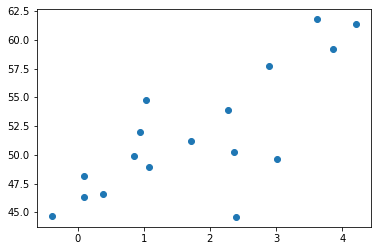

In [ ]:
plt.scatter(df[incomes], df[vote_share]);

# II. Split Data

### Split our **target vector** from our **feature matrix**

In [ ]:
y = df[vote_share]
X = df[[incomes]]

### Split our data into **training** and **test** sets

In [ ]:
cutoff = 2008
mask = X.index < 2008

In [ ]:
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~ mask], y.loc[~ mask]

In [ ]:
assert len(X_test) + len(X_train) == len(X)

In [ ]:
from sklearn.model_selection import train_test_split

split = train_test_split()

# III. Establish Baseline

In [ ]:
y_pred = [y_train.mean()] * len(y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
f'Baseline MAE: {mean_absolute_error(y_train, y_pred)}'

'Baseline MAE: 4.846938775510204'

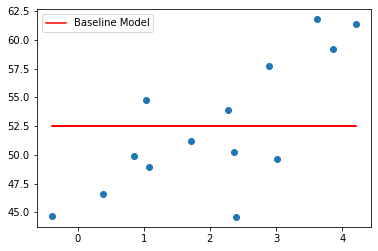

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = 'r', label = 'Baseline Model')
plt.legend();


# IV. Build Models

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train);

# V. Check Metrics

### Mean Absolute Error

In [ ]:
print(f'Training data MAE: {mean_absolute_error(y_train, model.predict(X_train))}')
print(f'Testing data MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
print(f'Baseline MAE: {mean_absolute_error(y_train, y_pred)}')

Training data MAE: 2.645479454315596
Testing data MAE: 1.7998717748375863
Baseline MAE: 4.846938775510204


### Root Mean Squared Error

In [ ]:
print(f'Training RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False)}')

Training RMSE: 3.6773568396257406
Test RMSE: 2.180652086836372


### $R^2$

In [ ]:
print(f'Training r2: {r2_score(y_train, model.predict(X_train))}')
print(f'Test r2: {r2_score(y_test, model.predict(X_test))}')

Training r2: 0.5663905156461234
Test r2: 0.14809080764669635


# VI. Communicate Results